In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
%matplotlib inline

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


The goal is to build a regression to be able to estimate the price of a house based on feature set. I will attempt to do this using traditional Machine Learning techniques as well as a perceptron.

In [3]:
# fetch the dataset
calif_housing=fetch_california_housing(data_home='./data')

In [4]:
calif_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [5]:
calif_df=pd.DataFrame(np.c_[calif_housing['data'],calif_housing['target']],columns = calif_housing['feature_names']+['target'])
calif_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
calif_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Exploring relationship of data accross entire set

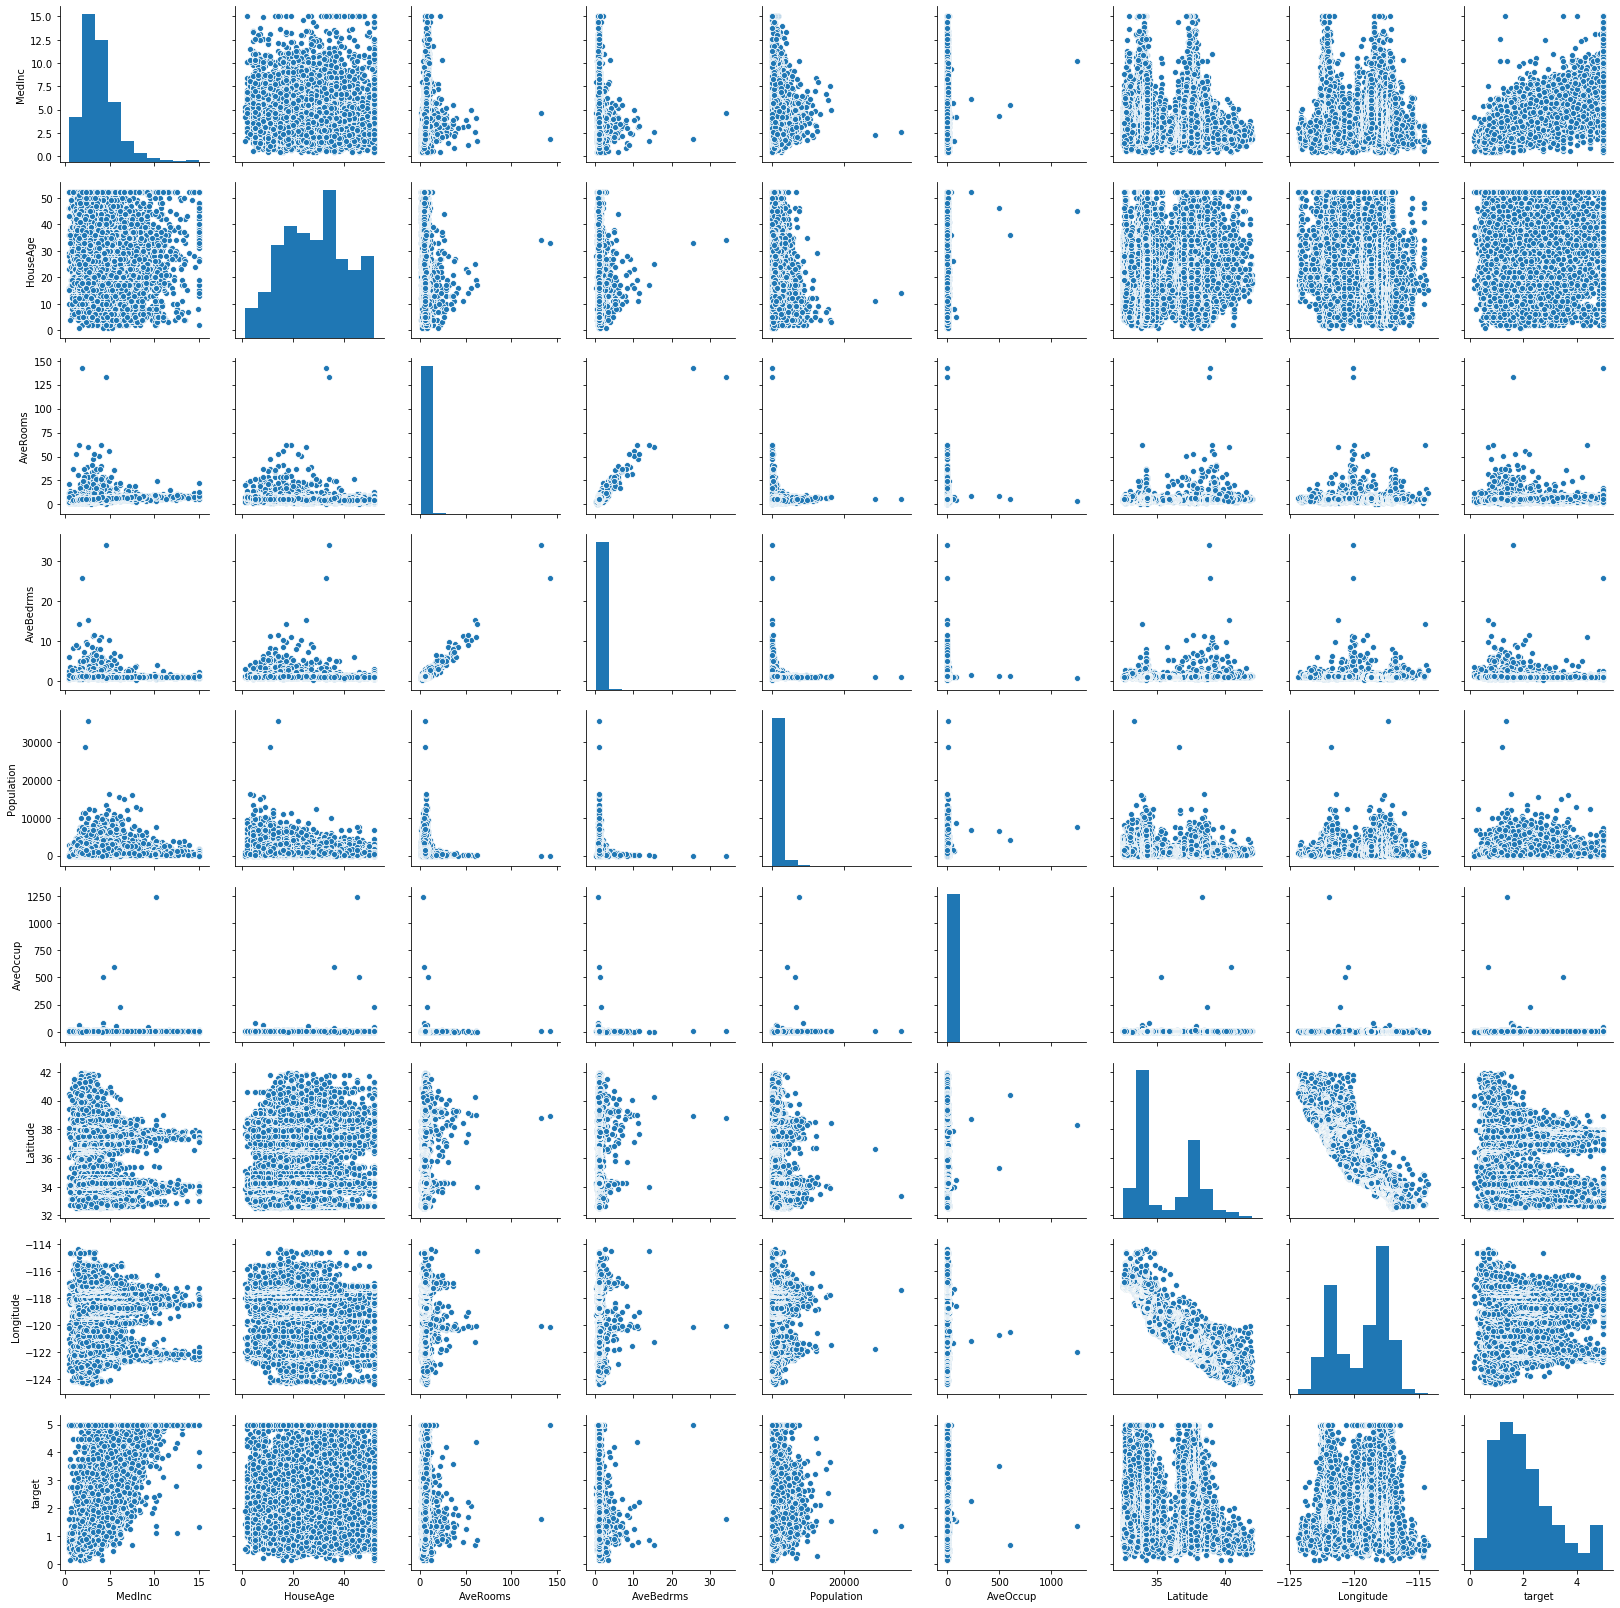

In [7]:
sns.pairplot(calif_df)

Train/Test Split

In [8]:
train_data = calif_df.sample(frac=0.8,random_state=0)
test_data = calif_df.drop(train_data.index)

In [9]:
train_stats = calif_df.describe()
train_stats.pop('target')
train_stats = train_stats.transpose()

# Split features from labels
y_train = train_data.pop('target')
y_test = test_data.pop('target')

y_train

14740    1.369
10101    2.413
20566    2.007
2670     0.725
15709    4.600
         ...  
7616     2.035
8767     4.875
16388    1.125
19949    0.541
10078    1.456
Name: target, Length: 16512, dtype: float64

Normalizing the data, mean is far to skewed amongst various features which could affect model accuracy. This will be used for the neural network. Other regression models will be built with both normalized and non-normalized data. 

In [10]:
def norm(x):
    return (x-train_stats['mean'])/train_stats['std']

norm_train_data = norm(train_data)
norm_test_data = norm(test_data)

K-Nearest Neightbor Regression
for this I will use the normalized data, this algorithm is easily influenced by varying data values.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt

# iterate through K values, checking against RMSE 

rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    knn = KNeighborsRegressor(n_neighbors = K)

    knn.fit(norm_train_data, y_train)  #fit the model
    pred = knn.predict(norm_test_data) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.8043473103354791
RMSE value for k=  2 is: 0.6947361125047531
RMSE value for k=  3 is: 0.659152465839342
RMSE value for k=  4 is: 0.6412155983167619
RMSE value for k=  5 is: 0.6277719951633244
RMSE value for k=  6 is: 0.6220074234970394
RMSE value for k=  7 is: 0.6187829531978085
RMSE value for k=  8 is: 0.620075032884
RMSE value for k=  9 is: 0.618900923190171
RMSE value for k=  10 is: 0.6181641839344328
RMSE value for k=  11 is: 0.6162140616206977
RMSE value for k=  12 is: 0.616580612129564
RMSE value for k=  13 is: 0.6162676350165106
RMSE value for k=  14 is: 0.6185176652476111
RMSE value for k=  15 is: 0.6193536192895439
RMSE value for k=  16 is: 0.6203345828519915
RMSE value for k=  17 is: 0.6212718787694589
RMSE value for k=  18 is: 0.6214144863857672
RMSE value for k=  19 is: 0.62180701117362
RMSE value for k=  20 is: 0.6222965584150487
RMSE value for k=  21 is: 0.6241105366867914
RMSE value for k=  22 is: 0.6243340638784602
RMSE value for k=  23 is: 0.

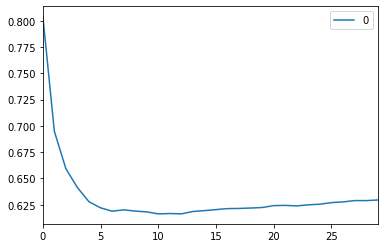

In [12]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val)  
curve.plot()

In [13]:
# find the k for which rmse (error) is minimum
print('lowest rmse: ', min(rmse_val),' at k = ',rmse_val.index(min(rmse_val)))

lowest rmse:  0.6162140616206977  at k =  10


In [14]:
# fit model to k = 10
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(norm_train_data, y_train)  #fit the model
pred = knn.predict(norm_test_data) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse

print(knn.score(norm_test_data,y_test))

0.7057333536901838


Text(0.5, 1.0, 'Predicted vs. Actual')

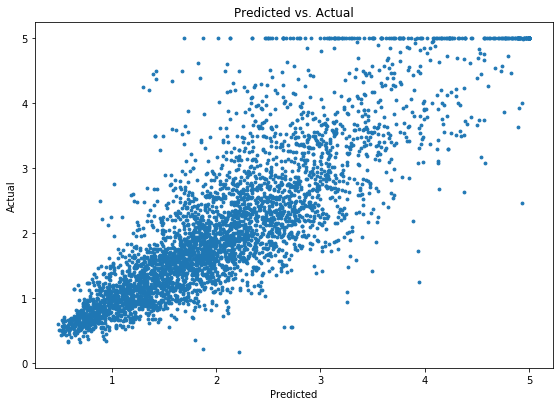

In [15]:
# plot predicted vs. actual
fig = plt.figure()

axes = fig.add_axes([0, 0, 1.2, 1.2])
axes.scatter(x=pred,y=y_test,s=8)
plt.xlabel("Predicted")
plt.ylabel("Actual")
axes.set_title('Predicted vs. Actual')

As we can see this model is not particularly accurate, the score 0.705, and the graph shows a fairly poor relationship between predicted and actual values.

Linear Regression
I will try using standard linear regression 

mse:  0.38212695829932336


Text(0.5, 1.0, 'Predicted vs. Actual')

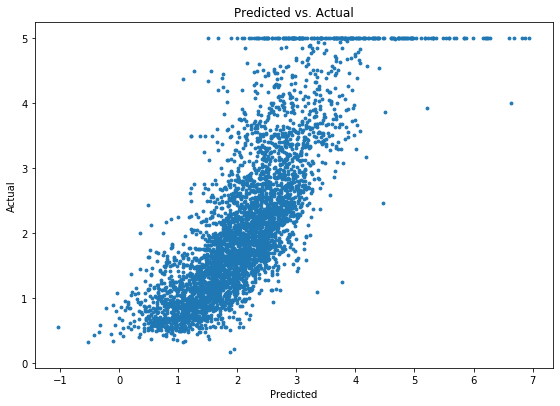

In [16]:
from sklearn.linear_model import LinearRegression
X = np.asanyarray(calif_df.drop(columns=['target']))
y = np.asanyarray(calif_df[['target']])

lg = LinearRegression()

lg.fit(train_data,y_train)
y_pred = lg.predict(test_data)

#print('lg score: ',lg.score(train_data,y_test))
print('mse: ',mean_squared_error(y_test,pred))
# plot predicted vs. actual
fig = plt.figure()

axes = fig.add_axes([0, 0, 1.2, 1.2])
axes.scatter(x=y_pred,y=y_test,s=8)
plt.xlabel("Predicted")
plt.ylabel("Actual")
axes.set_title('Predicted vs. Actual')

In [17]:
from sklearn.model_selection import cross_val_score
vscore = cross_val_score(lg,X,y,cv=10)
print('Cross validation score: ',vscore.mean())

Cross validation score:  0.5110068610523769


Neural Network:

In [28]:
n_cols = norm_train_data.shape[1]

# create model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu',input_shape=(n_cols,)),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss = 'mse',
                 optimizer=optimizer,
                 metrics=['mae','mse'])
    return model
    


In [29]:
model = build_model()

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [31]:
class printHash(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('#',end='')

EPOCHS = 1000

history = model.fit(
    norm_train_data, y_train,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[printHash()])


####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################
##########################################################################################

In [32]:
hist = pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.590198,0.283363,0.590198,0.500508,0.380201,0.500508,995
996,0.893738,0.285362,0.893738,0.609934,0.397420,0.609934,996
997,0.275365,0.281511,0.275366,0.334734,0.372223,0.334734,997
998,0.427489,0.280828,0.427489,0.370927,0.377573,0.370927,998
999,0.208609,0.279400,0.208609,0.606780,0.386140,0.606780,999


In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabes('Epoch')
    plt.ylabel('MAE [price]')
    plt.plot(hist['epoch'],hist['mean_absolute_error',
                               label='Train Error'])
    plt.plot(hist['epoch'],hist['val_mean_absolute,error'],
            label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

In [ ]:
plot_history(history)